## PERCEPTRON DE MÚLTIPLAS CAMADAS

### BIBILIOTECAS BÁSICAS:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, Adamax

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

### CARREGAMENTO DOS DATASETS:

In [38]:
carregando_clear = np.load('D:\\Dados capturados\\DATASETS\\CLEAR.npy', mmap_mode='r')
dados_clear = carregando_clear[:1000000]

carregamento_lte1m = np.load('D:\\Dados capturados\\DATASETS\\LTE_1M.npy', mmap_mode='r')
dados_lte1m = carregamento_lte1m[:1000000]

dados_wifi = np.load('D:\\Dados capturados\\DATASETS\\WIFI.npy', mmap_mode='r')
dados_wifi = dados_wifi[:1000000]

### SEPARAÇÃO DAS PARTES REAL E IMAGINÁRIA:

In [39]:
def sep_col_comp(dados):
    parte_real = dados.real
    parte_imag = dados.imag
    return parte_real , parte_imag

def montagem_datasets(dados_1 , dados_2):
    real1 , imag1 = sep_col_comp(dados_1)
    real2 , imag2 = sep_col_comp(dados_2)
    atrib1 = np.zeros(len(dados_1))
    atrib2 = np.ones(len(dados_2))
    dados1 = np.column_stack((real1,imag1,atrib1))
    dados2 = np.column_stack((real2,imag2,atrib2))
    conjunto = np.vstack([dados1 , dados2])
    indices = np.random.permutation(len(conjunto))
    dados = conjunto[indices]
    return dados

def remodel(dados , feature):
    df = pd.DataFrame(dados , columns = ['real' , 'imag' , 'clfq'])
    df_junt = df[['real' , 'imag']].to_numpy()
    dados_dim = df_junt
    dados_dim = dados_dim.astype(np.float32)
    alvo = df['clfq'].values
    alvo_dim = alvo
    alvo_dim = alvo_dim.astype(np.float32)
    
    return dados_dim , alvo_dim

def processos(dados_1 , dados_2 , feature):
    dados = montagem_datasets(dados_1 , dados_2)
    X , Y = remodel(dados , feature)
    return X , Y

### CLEAR X LTE

#### CARREGAMENTO DOS DADOS:

In [40]:
X,Y = processos(dados_clear, dados_lte1m ,2)

print(X)
print(Y)

[[ 0.0000000e+00  1.2207449e-04]
 [ 9.1555863e-05  3.0518622e-05]
 [ 1.2207449e-04  4.5777933e-04]
 ...
 [-3.0518622e-05  2.1363035e-04]
 [ 6.1037244e-05  0.0000000e+00]
 [-2.1363035e-04  3.0518622e-05]]
[1. 0. 0. ... 1. 0. 0.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [41]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [42]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

print(trainX_scaled)
print(testX_scaled)


[[ 2.0902507  -0.8174813 ]
 [-1.2643291   1.6269159 ]
 [-0.42568412  1.4232162 ]
 ...
 [ 0.6226221   0.40471733]
 [-1.8933129  -0.00268222]
 [-1.2643291  -0.00268222]]
[[ 0.6226221  -0.41008174]
 [-1.6836517  -0.6137815 ]
 [-0.2160229  -1.0211811 ]
 ...
 [ 0.8322833   0.81211686]
 [ 0.41296086 -0.41008174]
 [-0.00636165 -1.6322805 ]]


#### TREINAMENTO DO MODELO:

In [43]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf.fit(trainX_scaled, Y_train)

Iteration 1, loss = 0.69107644
Validation score: 0.529600
Iteration 2, loss = 0.68976744
Validation score: 0.531175
Iteration 3, loss = 0.68961817
Validation score: 0.531125
Iteration 4, loss = 0.68956770
Validation score: 0.530825
Iteration 5, loss = 0.68952535
Validation score: 0.530875
Iteration 6, loss = 0.68949006
Validation score: 0.531425
Iteration 7, loss = 0.68946894
Validation score: 0.530800
Iteration 8, loss = 0.68945362
Validation score: 0.530675
Iteration 9, loss = 0.68942966
Validation score: 0.531750
Iteration 10, loss = 0.68943241
Validation score: 0.530550
Iteration 11, loss = 0.68940979
Validation score: 0.531200
Iteration 12, loss = 0.68940593
Validation score: 0.530400
Iteration 13, loss = 0.68940966
Validation score: 0.531050
Iteration 14, loss = 0.68940018
Validation score: 0.530900
Iteration 15, loss = 0.68939144
Validation score: 0.529750
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Setting learning rate to 0.000200
Iteratio

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [44]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.53


#### MATRIZ DE CONFUSÃO:

In [45]:
cm = confusion_matrix(Y_test, y_pred, labels=mlp_clf.classes_)

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)

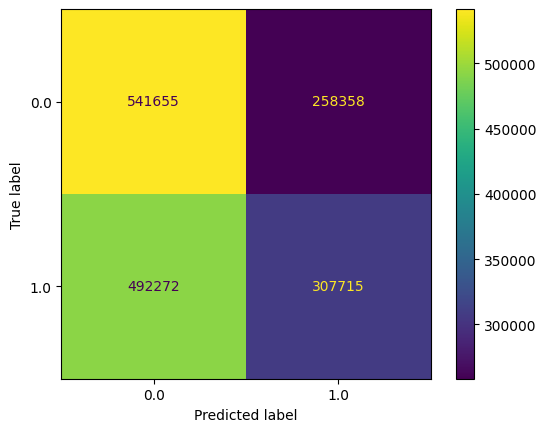

In [47]:
disp.plot()

              precision    recall  f1-score   support

         0.0       0.52      0.68      0.59    800013
         1.0       0.54      0.38      0.45    799987

    accuracy                           0.53   1600000
   macro avg       0.53      0.53      0.52   1600000
weighted avg       0.53      0.53      0.52   1600000



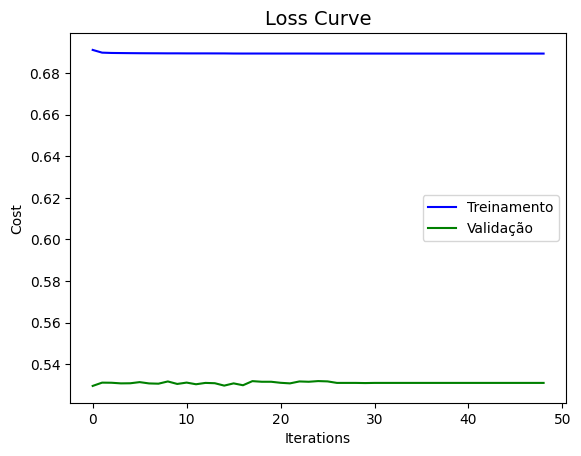

In [60]:
print(classification_report(Y_test, y_pred))

plt.plot(mlp_clf.loss_curve_ , label = 'Treinamento' , color = 'b')
plt.plot(mlp_clf.validation_scores_ , label = 'Validação' , color = 'g')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.show()

### CLEAR X WIFI

#### CARREGAMENTO DOS DADOS:

In [49]:
X_2,Y_2 = processos(dados_clear, dados_wifi ,2)

print(X_2)
print(Y_2)

[[ 6.1037244e-05 -9.1555863e-05]
 [-9.1555863e-05 -1.5259311e-04]
 [ 1.5259311e-04 -2.7466760e-04]
 ...
 [-3.3570486e-04  9.1555863e-05]
 [ 1.2207449e-04 -3.0518622e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[0. 0. 1. ... 1. 0. 1.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [50]:
X_2_train , X_2_test , Y_2_train , Y_2_test = train_test_split(X_2, Y_2, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [51]:
sc_2=StandardScaler()

scaler_2 = sc_2.fit(X_2_train)
trainX_2_scaled = scaler.transform(X_2_train)
testX_2_scaled = scaler.transform(X_2_test)

#### TREINAMENTO DO MODELO:

In [52]:
mlp_clf_2 = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf_2.fit(trainX_2_scaled, Y_2_train)

Iteration 1, loss = 0.67819495
Validation score: 0.582225
Iteration 2, loss = 0.66545707
Validation score: 0.583375
Iteration 3, loss = 0.66434838
Validation score: 0.582900
Iteration 4, loss = 0.66392387
Validation score: 0.585300
Iteration 5, loss = 0.66373837
Validation score: 0.585850
Iteration 6, loss = 0.66359727
Validation score: 0.584900
Iteration 7, loss = 0.66350156
Validation score: 0.584850
Iteration 8, loss = 0.66344538
Validation score: 0.583575
Iteration 9, loss = 0.66338666
Validation score: 0.584475
Iteration 10, loss = 0.66332504
Validation score: 0.585800
Iteration 11, loss = 0.66330803
Validation score: 0.584300
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Setting learning rate to 0.000200
Iteration 12, loss = 0.66322109
Validation score: 0.584625
Iteration 13, loss = 0.66320929
Validation score: 0.584625
Iteration 14, loss = 0.66320884
Validation score: 0.584575
Iteration 15, loss = 0.66320587
Validation score: 0.584450
Iteratio

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [53]:
y_2_pred = mlp_clf_2.predict(testX_2_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_2_test, y_2_pred)))

Accuracy: 0.59


#### MATRIZ DE CONFUSÃO:

In [54]:
cm_2 = confusion_matrix(Y_2_test, y_2_pred, labels=mlp_clf_2.classes_)

In [55]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=mlp_clf_2.classes_)

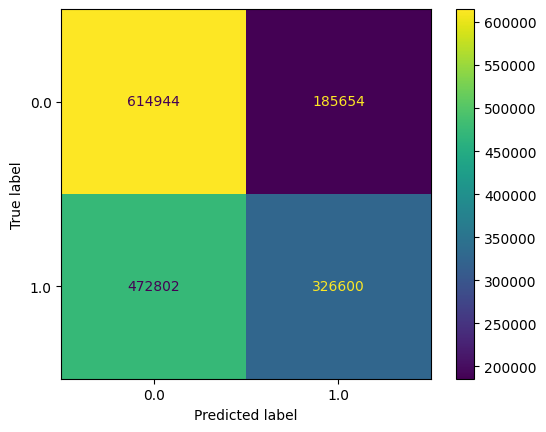

In [56]:
disp_2.plot()

              precision    recall  f1-score   support

         0.0       0.57      0.77      0.65    800598
         1.0       0.64      0.41      0.50    799402

    accuracy                           0.59   1600000
   macro avg       0.60      0.59      0.57   1600000
weighted avg       0.60      0.59      0.57   1600000



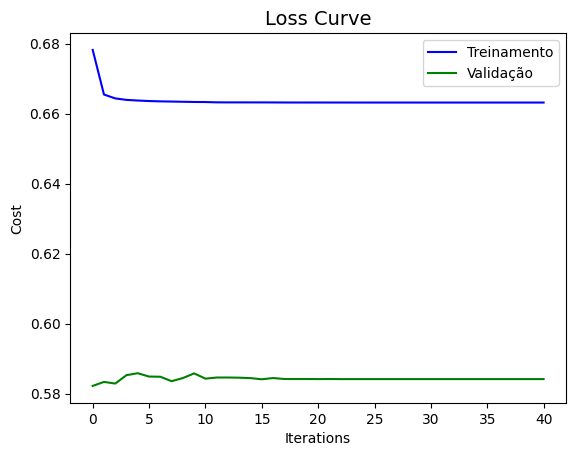

In [59]:
print(classification_report(Y_2_test, y_2_pred))

plt.plot(mlp_clf_2.loss_curve_ , label = 'Treinamento' , color = 'b')
plt.plot(mlp_clf_2.validation_scores_ , label = 'Validação' , color = 'g')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.show()

### LTE X WIFI

#### CARREGAMENTO DOS DADOS:

In [61]:
X_3,Y_3 = processos(dados_lte1m, dados_wifi ,2)

print(X_3)
print(Y_3)

[[ 3.9674208e-04  3.0518623e-04]
 [-9.1555863e-05  1.8311173e-04]
 [-6.1037244e-05 -1.8311173e-04]
 ...
 [-2.4414898e-04  1.2207449e-04]
 [-1.8311173e-04 -6.7140971e-04]
 [-1.2207449e-04 -1.8311173e-04]]
[1. 0. 0. ... 1. 1. 1.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [64]:
X_3_train , X_3_test , Y_3_train , Y_3_test = train_test_split(X_3, Y_3, test_size=0.8)

#### NORMALIZAÇÃO DOS DADOS:

In [65]:
sc_3=StandardScaler()

scaler_3= sc_2.fit(X_3_train)
trainX_3_scaled = scaler.transform(X_3_train)
testX_3_scaled = scaler.transform(X_3_test)

#### TREINAMENTO DO MODELO:

In [66]:
mlp_clf_3 = MLPClassifier(hidden_layer_sizes=(400,200,100,20), verbose= True , tol=0.000001,
                        max_iter = 100, activation = 'relu', shuffle=True, n_iter_no_change = 5,
                        solver = 'sgd', early_stopping=True, learning_rate= 'adaptive' 
                        )

mlp_clf_3.fit(trainX_3_scaled, Y_3_train)

Iteration 1, loss = 0.68715478
Validation score: 0.554550
Iteration 2, loss = 0.68125599
Validation score: 0.557300
Iteration 3, loss = 0.68025037
Validation score: 0.557875
Iteration 4, loss = 0.67989311
Validation score: 0.557650
Iteration 5, loss = 0.67971361
Validation score: 0.558100
Iteration 6, loss = 0.67960235
Validation score: 0.558500
Iteration 7, loss = 0.67953837
Validation score: 0.556950
Iteration 8, loss = 0.67947629
Validation score: 0.558875
Iteration 9, loss = 0.67943469
Validation score: 0.558175
Iteration 10, loss = 0.67941192
Validation score: 0.557225
Iteration 11, loss = 0.67938762
Validation score: 0.557375
Iteration 12, loss = 0.67939184
Validation score: 0.558800
Iteration 13, loss = 0.67936081
Validation score: 0.558025
Iteration 14, loss = 0.67936580
Validation score: 0.558400
Validation score did not improve more than tol=0.000001 for 5 consecutive epochs. Setting learning rate to 0.000200
Iteration 15, loss = 0.67928814
Validation score: 0.557750
Iteratio

MLPClassifier(early_stopping=True, hidden_layer_sizes=(400, 200, 100, 20),
              learning_rate='adaptive', max_iter=100, n_iter_no_change=5,
              solver='sgd', tol=1e-06, verbose=True)

#### ACURÁCIA:

In [67]:
y_3_pred = mlp_clf_3.predict(testX_3_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_3_test, y_3_pred)))

Accuracy: 0.56


#### MATRIZ DE CONFUSÃO:

In [68]:
cm_3 = confusion_matrix(Y_3_test, y_3_pred, labels=mlp_clf_3.classes_)

In [69]:
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=mlp_clf_3.classes_)

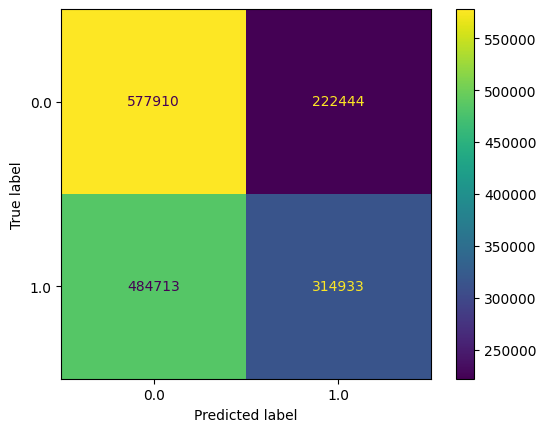

In [70]:
disp_3.plot()

              precision    recall  f1-score   support

         0.0       0.54      0.72      0.62    800354
         1.0       0.59      0.39      0.47    799646

    accuracy                           0.56   1600000
   macro avg       0.56      0.56      0.55   1600000
weighted avg       0.56      0.56      0.55   1600000



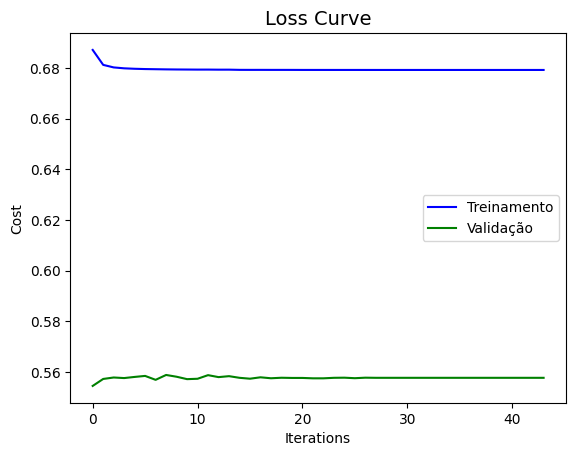

In [71]:
print(classification_report(Y_3_test, y_3_pred))

plt.plot(mlp_clf_3.loss_curve_ , label = 'Treinamento' , color = 'b')
plt.plot(mlp_clf_3.validation_scores_ , label = 'Validação' , color = 'g')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.show()